In [1]:
t0_utc="2020-04-27T18:32:00"
t1_rel_days=-1
t2_rel_days=1.5
source_name="SGR 1935+2154"

In [ ]:
# 2020 Feb     02.56 and 2020 Feb 04.34

In [4]:
from astroquery.simbad import Simbad
t=Simbad.query_object(source_name)

In [16]:
from astropy.coordinates import SkyCoord

In [19]:
source_coord = SkyCoord(t[0]['RA'], t[0]['DEC'], unit=("hourangle", "deg"))

In [23]:
import importlib

In [24]:
import integralclient as ic
importlib.reload(ic)
ic.__file__

selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda


'/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/integralclient.py'

In [25]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [26]:
t0_ijd = float(ic.converttime("UTC", t0_utc, "IJD"))
t0_ijd

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-27T18:32:00/IJD


7422.773022962963

In [27]:
t1_ijd = t0_ijd+t1_rel_days
t2_ijd = t0_ijd+t2_rel_days

In [28]:
[ic.converttime("IJD", t1_ijd, "UTC"), ic.converttime("IJD", t0_ijd, "UTC"), ic.converttime("IJD", t2_ijd, "UTC")]


url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7421.7730229629632959/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.7730229629632959/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.2730229629632959/UTC


['2020-04-26T18:32:00.000',
 '2020-04-27T18:32:00.000',
 '2020-04-29T06:32:00.000']

In [29]:
r1,r0,r2=map(int,[ic.converttime("IJD", t1_ijd, "REVNUM"), ic.converttime("IJD", t0_ijd, "REVNUM"), ic.converttime("IJD", t2_ijd, "REVNUM")])
r1,r0,r2

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7421.7730229629632959/REVNUM
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.7730229629632959/REVNUM
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.2730229629632959/REVNUM


(2221, 2221, 2222)

In [30]:
import numpy as np

In [32]:
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
import matplotlib as mpl



In [34]:
r_t1, r_t2 = map(float, ic.converttime("REVNUM", r1, "IJD", debug=True).split()[1:])

r_t1

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2221/IJD


7420.278150277778

In [54]:
import glob

atts=[]
for rev in range(r1-1,r2+1): 
    print(rev)
    
    for attf in glob.glob("/mnt/sshfs/isdc-in01/isdc/arc/rev_3/aux/adp/%4i.000/attitude_*.fits*"%rev) + \
                glob.glob("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/%4i.000/attitude_*.fits*"%rev):
        
        print("att?", attf)
        f=fits.open(attf)
        break
    atts.append(f[1].data)
att=np.hstack(atts)
att

2220
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2220.000/attitude_predicted_01.fits
2221
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2221.000/attitude_predicted_01.fits
2222
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2222.000/attitude_predicted_01.fits


array([(b'22200000', b'P', b' ', 0, 7417.61589333, 7417.61589333, 7417.61589333, 12937.52, nan, 261.7587 , -31.902472, 357.27213 , -8.773916 , b'            ',  0.,  0., 129., 255, nan, nan, nan),
       (b'22200001', b'O', b' ', 0, 7417.7656387 , 7417.78009472, 7417.7656387 ,     0.  , nan, 261.7684 , -31.893917, 357.2755  , -8.766889 , b'            ', nan, nan, 129., 255, nan, nan, nan),
       (b'22200001', b'O', b' ', 1, 7417.7656387 , 7417.78009472, 7417.76574287,     0.  , nan, 261.79758, -31.868221, 357.28568 , -8.745806 , b'            ', nan, nan, 129., 255, nan, nan, nan),
       ...,
       (b'22220097', b'O', b' ', 8, 7425.39503685, 7425.39583546, 7425.39583546,     0.  , nan, 280.     , -50.      ,  19.201084, -7.6418333, b'            ', nan, nan, 119., 255, nan, nan, nan),
       (b'22220097', b'S', b' ', 0, 7425.39503685, 7425.39583546, 7425.39583546,     0.  , nan, 280.     , -50.      ,  19.201166, -7.6419168, b'            ',  0.,  0., 119., 255, nan, nan, nan),
   

In [61]:
t_ref_isot = "2020-04-28T00:00:00"
t_ref_ijd=float(ic.converttime("UTC", t_ref_isot, "IJD"))

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T00:00:00/IJD


In [92]:
source_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (293.732, 21.89672222)>

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in arccos


<IPython.core.display.Javascript object>


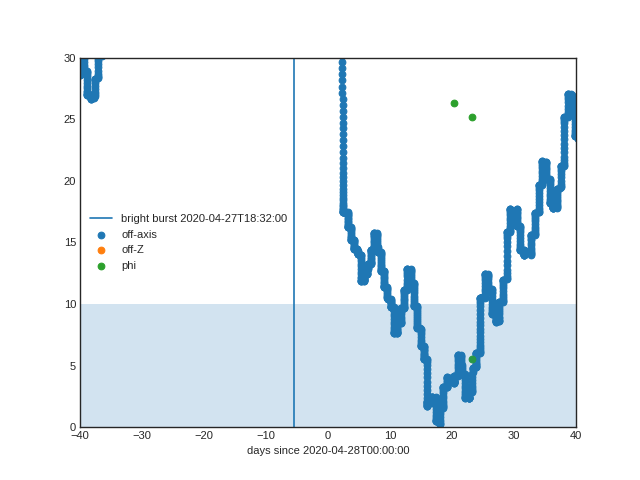

In [132]:
scx=SkyCoord(att['RA_SCX'],att['DEC_SCX'],unit="deg")
scz=SkyCoord(att['RA_SCZ'],att['DEC_SCZ'],unit="deg")

scx.separation(source_coord).deg




source_on_scx = source_coord.cartesian.x.value*scx.cartesian.x.value + \
source_coord.cartesian.y.value*scx.cartesian.y.value + \
source_coord.cartesian.z.value*scx.cartesian.z.value

source_in_zy = np.array([scx.cartesian.x - source_coord.cartesian.x*source_on_scx, \
               scx.cartesian.y - source_coord.cartesian.y*source_on_scx, \
               scx.cartesian.z - source_coord.cartesian.z*source_on_scx])

source_in_zy/=np.sum(source_in_zy**2,0)


source_on_z_in_zy = source_in_zy[0]*scz.cartesian.x.value + \
source_in_zy[1]*scz.cartesian.y.value + \
source_in_zy[2]*scz.cartesian.z.value

source_theta_deg = np.arccos(source_on_scx)/np.pi*180
source_phi_deg = np.arccos(source_on_z_in_zy)/np.pi*180

plt.figure(figsize=(8,6))

plt.scatter(
        (att['TIME']-t_ref_ijd)*24,
        scx.separation(source_coord).deg,
        label="off-axis"
    )

plt.scatter(
        (att['TIME']-t_ref_ijd)*24,
        scz.separation(source_coord).deg,
        label="off-Z"
    )

#plt.plot(
#        att['TIME']-t0_ijd,
#        source_theta_deg,
#        label="theta"
#    )

plt.scatter(
        (att['TIME']-t_ref_ijd)*24,
        source_phi_deg,
        label="phi"
    )


plt.axvline((t0_ijd-t_ref_ijd)*24, label="bright burst "+t0_utc)

plt.xlabel("days since "+t_ref_isot)

plt.axhspan(0, 10, alpha=0.2)

plt.ylim([0,30])
#plt.xlim(t1_rel_days, t2_rel_days)
plt.xlim(-40,40)


plt.legend()

In [20]:
import healpy as hp

In [ ]:
f=plt.figure()

plt.scatter(
        source_phi_deg,
        180-source_theta_deg,
        c=att['TIME']-t0_ijd
)

plt.xlim([0,180])
plt.ylim([0,180])


In [118]:
ds = []
for lfn in open("ReduceBursts-list.txt"):
    print("?",lfn)
    fn=lfn.strip().split()[-1]
    print(lfn,fn)
    d=pd.read_csv(fn)
    
    try:
        print(len(d.columns),np.min(d['Classification.burst_data.time'])-t0_ijd,np.max(d['Classification.burst_data.time'])-t0_ijd)
    except:
        print("skipping")
    
    ds.append(d)     

        
d=pd.concat(ds).reset_index()
print(np.min(d['Classification.burst_data.time'])-t0_ijd,np.max(d['Classification.burst_data.time'])-t0_ijd)

? /data/reduced/ddcache/byrev/2200/ReduceBursts.v1/10d5879a/burst_results.txt.gz

/data/reduced/ddcache/byrev/2200/ReduceBursts.v1/10d5879a/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2200/ReduceBursts.v1/10d5879a/burst_results.txt.gz
440 -58.03948662595849 -55.962145734101796
? /data/reduced/ddcache/byrev/2221/ReduceBursts.v1/bf99957b/burst_results.txt.gz

/data/reduced/ddcache/byrev/2221/ReduceBursts.v1/bf99957b/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2221/ReduceBursts.v1/bf99957b/burst_results.txt.gz
440 -2.170417464187267 -0.12525020739667525
? /data/reduced/ddcache/byrev/2219/ReduceBursts.v1/b3a64e77/burst_results.txt.gz

/data/reduced/ddcache/byrev/2219/ReduceBursts.v1/b3a64e77/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2219/ReduceBursts.v1/b3a64e77/burst_results.txt.gz
440 -7.533056958964153 -5.465105487705841
? /data/reduced/ddcache/byrev/2220/ReduceBursts.v1/ea625a8f/burst_results.txt.gz

/data/reduced/ddcache/byrev/2220/ReduceBursts.v1/ea625a8f/burst_re

In [119]:
r_times=[]
r_gaps=[]

end=None

revr=[]

for rev in range(r1-1,r2+2): 
    print(rev)
    i1, i2 = list(map(float,ic.converttime("REVNUM",rev,"IJD").split()[1:]))
    
    
    t=np.array(d['Classification.burst_data.time'])
    t=t[(t>i1) & (t<i2)]
    
    if len(t)==0:
        print("empty")
        continue
        
    revr.append([i1,i2])    
    
    id1=min(t)
    id2=max(t)
    
    r_times.append([id1,id2])
    if end is not None:
        r_gaps.append((end,id1))
    end=id2

r_times
r_gaps

2220
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2220/IJD
2221
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2221/IJD
2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2223/IJD
empty


[(7419.946426094746, 7420.602605498776),
 (7422.647772755567, 7423.209192870177)]

In [120]:
np.nanpercentile(d["BackgroundStability.byscale.2.7.bkg_excvar"],50)

1.1406521039805395

In [121]:

known_grbs=[dict(zip(["name", "utc", "ra", "dec"], r)) for r in [
    #("GRB 180418", "2018-04-18T06:44:06",228.047, -8.148),            
]]

#tt = float(ic.converttime("UTC","2018-04-13T02:49:43","IJD"))
for grb in known_grbs:
    grb['ijd'] = float(ic.converttime("UTC",grb['utc'],"IJD"))

known_grbs

[]

<IPython.core.display.Javascript object>


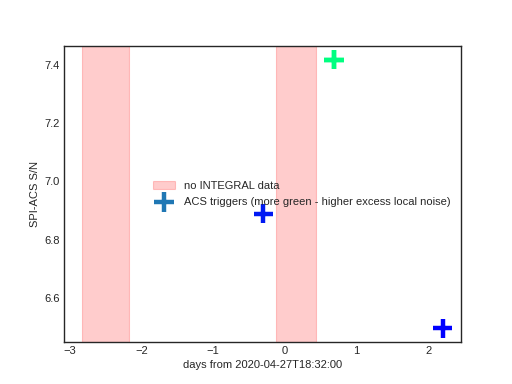

4

In [122]:
mpl.style.use('seaborn-white')

#plt.figure(figsize=(8,6))
plt.figure()



m=d["BackgroundStability.byscale.2.7.bkg_excvar"]<1.5 #np.nanpercentile(d["BackgroundStability.byscale.2.7.bkg_excvar"],50)

#!!!
#m&=(d["Durations.durations.spikeprob"]<0.1) #| (d["Classification.burst_data.len_clean"]>5./24/3600)
m&=(d["Durations.durations.spikeprob"]<0.1) #| (d["Classification.burst_data.len_clean"]>5./24/3600)
#m&=(d["SpikeLike.spikeresults.spikeprob"]<0.1) | (d["Durations.durations.duration"]>5./24/3600)

m&=d["Classification.burst_data.time"]>t0_ijd-1

m&=d["Classification.burst_data.time"]>t0_ijd-10
m&=d["Classification.burst_data.time"]<t0_ijd+10

m&=d["Classification.burst_data.maxsig"]>6
m&=d['Classification.burst_data.maxsig_r']>=0

if False:
    plt.scatter(
    d['Classification.burst_data.time']- t0_ijd, 
    d['Classification.burst_data.maxsig'],
    alpha=0.05
)

plt.scatter(
    d['Classification.burst_data.time'][m] - t0_ijd, 
    d['Classification.burst_data.maxsig'][m],
    c=d["BackgroundStability.byscale.2.7.bkg_std"][m],
    cmap="winter",
    label="ACS triggers (more green - higher excess local noise)",
    marker='+',
    s=300,
    lw=4,
)

plt.xlabel("days from %s"%t0_utc)

#label="known GRB"
label=None
for grb in known_grbs:
    plt.axvline(grb['ijd']-t0_ijd,label=label,c='b',ls='--')
    plt.text(
                grb['ijd']-t0_ijd,30,
                grb['name'],
                rotation="vertical",
                ha="right",
                c='b',
    )
    label=None
    
#plt.axvspan(-0.76,0,alpha=0.2,label="ZTF20aajnksq search region")

label="no INTEGRAL data"
for r_g1, r_g2 in r_gaps:
    plt.axvspan(r_g1-t0_ijd,r_g2-t0_ijd,color="r",alpha=0.2,label=label)    
    label=None
    
#plt.ylim([0,50])

plt.ylabel("SPI-ACS S/N")

#plt.axvline(t1_r_ijd-t0_ijd, ls="--", c='m')
#plt.axvline(t2_r_ijd-t0_ijd, ls="--", c='m', label=t1_r_label+", "+t2_r_label)

plt.legend()

#plt.text(t1_r_ijd, t1_r_label)

len(d['Classification.burst_data.time'][m])


#plt.axvline(tt1-t0_ijd)

In [123]:
d['len_s']=d['Classification.burst_data.len']*24*3600


d[m][['len_s','Classification.burst_data.maxsig','Classification.burst_data.time']]


,len_s,Classification.burst_data.maxsig,Classification.burst_data.time
127,-0.150000,6.888897,7422.474173
276,-0.050000,7.419216,7423.455691
286,-0.050000,7.419216,7423.455691
329,-0.049998,6.494865,7424.972765


In [124]:
import datetime
import glob

def utc2path(utc):
    utc_date=datetime.datetime.strptime(utc, "%Y-%m-%dT%H:%M:%S.%f")
    
    r = "/byburst/byyear/"
    r += "/%.4i" % utc_date.year
    r += "/%.4i-%.2i" % (utc_date.year,utc_date.month)
    r += "/%.4i-%.2i-%.2i" % (utc_date.year,utc_date.month,utc_date.day)
    r += "/%s" % utc.replace(":","-")
    r += "/" 
    return r

#utc2path(utc)

In [125]:
resolutions=[1]+list(map(int,open("resolutions.txt").readlines()))

def rebin(x,n,o=0,av=True):
    x=np.array(x)
    
    N=int(x.shape[0]/n)
  #  print(N)
    return x[:N*n].reshape((N,n)).mean(1)

def plot(lcb, t0, len_s, basescales, extrascales, span_s):
    plt.figure()
    
    assoc=get_assoc(t0)
    
    if len(assoc)>0:
        plt.title("aka "+", ".join([a['name'] for a in assoc]))
    else:
        print("no associations for", t0)
    
    
    basescales=list(map(int, basescales))
    scales=list(map(int, basescales+extrascales))

    if min(basescales)<3:
        plt.plot(
            (lcb.t-t0)*24*3600, 
            lcb.c,
            alpha=0.1
    )

    bestymin=None
    bestymax=None
    
    for n in scales:
        nN=resolutions[int(n)]
        
        s_c=rebin(lcb.c,nN)
        s_ce=rebin(lcb.ce,nN)/nN**0.5
        
        plt.errorbar(
            (rebin(lcb.t,nN)-t0)*24*3600, 
            s_c,
            s_ce,
            label="%.3lgs"%(nN*0.05)
        )
                
        newmax=np.max(s_c+s_ce*3)
        newmin=np.min(s_c-s_ce*3)
        
        if bestymax is None or newmax>bestymax:
            bestymax=newmax
        
        if bestymin is None or newmin<bestymin:
            bestymin=newmin
    
    plt.axvspan(0,len_s,alpha=0.1)
    plt.axvspan(
            0-resolutions[basescales[0]]*0.05,
            len_s+resolutions[basescales[1]]*0.05,
            alpha=0.1)
    
    plt.legend()
    
    plt.xlim([-span_s,span_s])
    plt.ylim([bestymin,bestymax])
    
    plt.xlabel("second since %s"%ic.converttime("IJD", t0, "UTC"))
    


In [126]:
import os

def get_assoc(t0, limit=100):
    print(ic.converttime("IJD", t0, "UTC"))
    
    associations=[]
    for g in known_grbs:
        dist_s=(t0-g['ijd'])*24*3600
        if abs(dist_s)<limit:
            print(dist_s)
            associations.append(g)
            
    return associations
                
get_assoc(7334.24911,100)

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7334.2491099999997459/UTC
2020-01-30T05:57:33.919


[]

In [127]:
d=d.sort_values('Classification.burst_data.time')


/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until



url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2221/IJD
2020-04-27T11:21:39.366 7422.474173041674 0.8500003401422875 6.8888971827917285 2221
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7420.2781502777779679/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
rev 2020-04-25T06:39:23.000 2020-04-27T22:30:46.999
Durations.durations.spikeprob 0.0052897407207698425
SpikeLike.spikeresults.spikeprob 0.145904676271017
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04-27T11:21:39.366+7.4&submit=Submit
t90 0.25000096211442724
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-04/2020-04-27/2020-04-27T11-21-39.366//LCData.v2*/*/output.txt.gz
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC


<IPython.core.display.Javascript object>


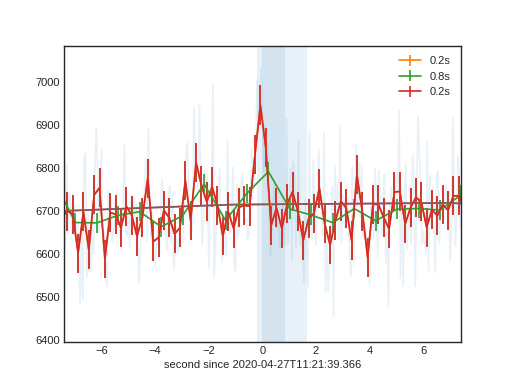

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC
2020-04-27T11:21:39.366
no associations for 7422.474173041674
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2020-04-28T10:55:02.548 7423.4556913448705 0.14999957929830993 7.41921597052746 2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987174074070936/UTC
rev 2020-04-27T22:30:46.999 2020-04-30T14:20:59.999
Durations.durations.spikeprob 0.04365704771456059
SpikeLike.spikeresults.spikeprob 0.30594807501406834
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04

<IPython.core.display.Javascript object>


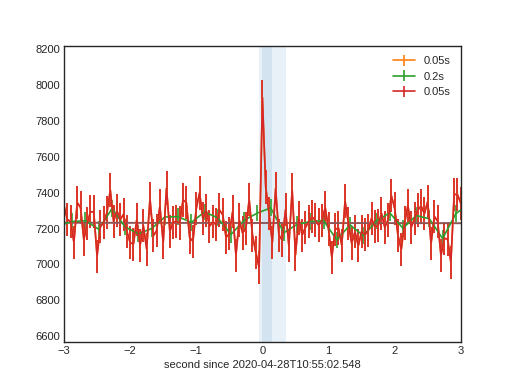

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC
2020-04-28T10:55:02.548
no associations for 7423.4556913448705
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2020-04-28T10:55:02.548 7423.4556913448705 0.14999957929830993 7.41921597052746 2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987174074070936/UTC
rev 2020-04-27T22:30:46.999 2020-04-30T14:20:59.999
Durations.durations.spikeprob 0.04365704771456059
SpikeLike.spikeresults.spikeprob 0.30594807501406834
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-0

<IPython.core.display.Javascript object>


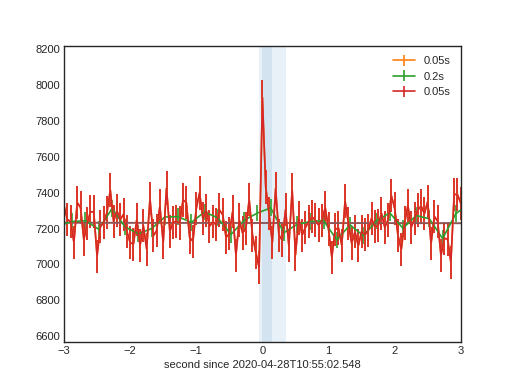

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC
2020-04-28T10:55:02.548
no associations for 7423.4556913448705
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2020-04-29T23:19:37.688 7424.972764725689 3.500001918291673 6.494864585686687 2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987174074070936/UTC
rev 2020-04-27T22:30:46.999 2020-04-30T14:20:59.999
Durations.durations.spikeprob 0.0632326466075005
SpikeLike.spikeresults.spikeprob 0.21045230372313897
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04-2

<IPython.core.display.Javascript object>


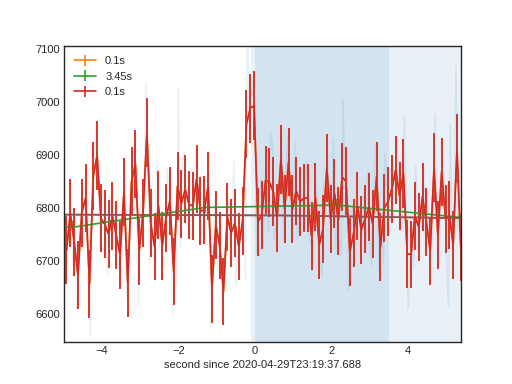

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.9727647256886485/UTC
2020-04-29T23:19:37.688
no associations for 7424.972764725689
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.9727647256886485/UTC


In [129]:
summary=[]

for i,(I,r) in enumerate(d[m].iterrows()):
    
    r['len_s'] = r['Classification.burst_data.len_clean']*24*3600
    
    print("\n", "="*30)
    #if i!=32: continue

    grb={}
    summary.append(grb)
    
    t=r['Classification.burst_data.time']
    times=ic.converttime("ANY","%.20lg"%t,"ANY",debug=False)
    utc=times['UTC']
    
    grb['utc'] = utc
    
    len_clean = r['len_s']+\
            (resolutions[int(r['Classification.burst_data.start_r'])]+\
             resolutions[int(r['Classification.burst_data.stop_r'])])*0.05
    
    rev_start,rev_stop=map(float,ic.converttime("REVNUM",times['REVNUM'],"IJD").split()[1:])
    
    print(utc, t, r['len_s'], r['Classification.burst_data.maxsig'], times['REVNUM'])
    print("rev", 
          ic.converttime("IJD", rev_start, "UTC"),
          ic.converttime("IJD", rev_stop, "UTC"),
         )
    
    for cc in "Durations.durations.spikeprob","SpikeLike.spikeresults.spikeprob":
        print(cc, r[cc])
    
 
    grb['duration']="%.3lg"%r['Durations.durations.t90']
    grb['maxsig_scale_s']=resolutions[int(r['Classification.burst_data.maxsig_r'])]
    grb['maxsig']="%.3lg"%r['Classification.burst_data.maxsig']
    
    span_s = max(3,len_clean*4)
    
    print("https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=%s+%.5lg&submit=Submit"%(utc,span_s))
    
    print("t90",r['Durations.durations.t90'])
    
    lcfnp="/data/reduced/ddcache/"+utc2path(utc)+"/LCData.v2*/*/output.txt.gz"
    print("lcfn pattern",lcfnp)
    lcfn = glob.glob(lcfnp)[0]
    lc=pd.read_csv(lcfn,delim_whitespace=True,names=["t","dt","c","ce","x","y"])
    
    
    lcfn = glob.glob("/data/reduced/ddcache/"+utc2path(utc)+"/LCDataB*/*/output.txt.gz")[0]
    lcb=pd.read_csv(lcfn,delim_whitespace=True,names=["t","dt","c","ce","x","y"])
    
    assoc=get_assoc(t)
    
    if len(assoc)==0:
        grb['grb_type']="Possible GRB"
        grb['comment'] ="no known associations"
    else:
        grb['grb_type']="Confirmed GRB"
        grb['comment'] =", ".join([a['name'] for a in assoc])
        
        
    grb['comment']+="\\n\\nINTEGRAL Untargeted All-Sky Detection Pipeline revision {}.\\n\\n https://doi.org/10.1051/0004-6361/201218877".format(r['Classification.burst_data.svnrev'])
    
    
    plot(lcb,
         t0=t,
         len_s=r['len_s'],
         basescales=[
                 r['Classification.burst_data.start_r'],
                 r['Classification.burst_data.stop_r'], 
                 r['Classification.burst_data.maxsig_r']],
         extrascales=[],
         span_s=span_s)
    
    fn="%.20lg.png"%t
    f_fn="/tmp/tmparc/"+fn
    plt.savefig(f_fn)
    #grb['lc_png_uri']="http://me-unige.odahub.io:8000/"+fn
    

    mlcfn=lcfn.replace("output.txt.gz","lc_combined.csv.gz")
    if not os.path.exists(mlcfn):
        print("lc missing:", mlcfn)
    else:
        mlc=pd.read_csv(mlcfn)
        plt.plot(
            (mlc.ijd-t)*24*3600,
            mlc.acs/20.,
        )
        
        plt.plot(
            (mlc.ijd-t)*24*3600,
            mlc.acs/20.,
        )

In [103]:
!mkdir -pv /tmp/tmparc

mkdir: created directory '/tmp/tmparc'


In [105]:
sdf = pd.DataFrame(summary)

sdf['triggerid']=sdf.utc.map(lambda x:(x.replace(":","-")+"-00000-00000-0"))

sdf.to_csv("summary.txt", index=False)

!pwd
!cat summary.txt

/mnt/nvme0n1p5/home/savchenk/work/SN2020bvc
utc,duration,maxsig_scale_s,maxsig,grb_type,comment,triggerid
2020-01-27T18:11:35.255,8.9,141,9.15,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-01-27T18-11-35.255-00000-00000-0
2020-01-29T04:22:53.516,69.5,582,12.6,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-01-29T04-22-53.516-00000-00000-0
2020-01-30T05:57:34.351,33.2,141,20,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-01-30T05-57-34.351-00000-00000-0
2020-01-30T09:59:58.614,10.5,16,40,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-01-30T09-59-58.614-00000-

In [88]:
for i,(I,r) in enumerate(d[m].iterrows()):
    t=r['Classification.burst_data.time']
    times=ic.converttime("ANY","%.20lg"%t,"ANY",debug=False)
    utc=times['UTC']
    
    print(utc[2:4]+utc[5:7]+utc[8:10])


/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


200127
200129
200130
200130
200130
200131
200201
200201
200204
200206
200207
200207
200207
200207
200208
200208
200209
200210
200210
200211
200211
200211
200213


In [ ]:
# 2018-05-04T03-15-48.6 GRB180504A 
# 2018-04-17T16-32-45.0 fermi sgrb, spikeclas